 * 출처: https://www.kaggle.com/venky73/youtube-trending-videos-analysis

# 한국 유튜브 트렌드 비디오 분석

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# 데이터 불러오기
df = pd.read_csv("data/KR_youtube_trending_data.csv")

In [3]:
# 데이터 확인
df.sample(5)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
16015,w5vOiUd0KZg,헤비급최강자 명현만 3대측정,2020-11-13T12:29:18Z,UCYJDUekoQz0-bo8al1diLWQ,말왕TV,17,2020-11-16T00:00:00Z,명현만|명승사자|3대측정|3대운동|벤치프레스|데드리프트|격투기,624642,6727,222,1642,https://i.ytimg.com/vi/w5vOiUd0KZg/default.jpg,False,False,**해당 영상은 NFL APPAREL의 간접광고가 포함되어 있습니다.말왕 이메일 :...
52569,PROXrrj-bqc,[산범] 머니게임 출연자 첫인상 - 🥕🍣⚡️💰🎾❄️🤷🏻‍♀️🤝😢🤬,2021-05-18T09:00:12Z,UC4DnB5Ez8LjKBXZDiYRIZGQ,산범 SANBUM,22,2021-05-21T00:00:00Z,[None],1676923,21346,410,3182,https://i.ytimg.com/vi/PROXrrj-bqc/default.jpg,False,False,#머니게임 #재밌었다 #넵 #공혁준 #논리왕전기 #가오가이 #박준형 #파이 #이루리...
60490,_65VZhAPdsY,🔮10년 걸릴 일도 한달 만에 잘 풀리는 마법! 15년 경력 타로 마스터가 알려주는...,2021-06-09T12:00:25Z,UCnaGfDaiM-pM1l-SXYpq37Q,MKTV 김미경TV,27,2021-06-17T00:00:00Z,MiKyung Kim|Kim MiKyung|Speaker|International ...,238021,6314,221,2646,https://i.ytimg.com/vi/_65VZhAPdsY/default.jpg,False,False,https://bit.ly/3pvFo3U
27636,fMjDV0Z0r9k,[1月의 무도] 아유..하기 싫어...😧 회장님의 노여움 정면으로 받는 무한상사에서...,2021-01-13T09:00:10Z,UChY4PXxJI0aJYsGT1X6INWA,옛능 : MBC 옛날 예능 다시보기,24,2021-01-16T00:00:00Z,무리한도전|무모한도전|무한도전레전드|유재석|정준하|박명수|정형돈|하하|노홍철|길|전...,514325,4146,131,530,https://i.ytimg.com/vi/fMjDV0Z0r9k/default.jpg,False,False,[무도의 1월은 어땠을까?]지하 2층으로 쫓겨난 무한 상사 영업부...회장님의 마음...
22743,j4P99MehSk4,어장관리 하는 내 친구2 친구가 내 남친을 낚았다 웹드라마 [십대의 세계] EP.14,2020-12-17T09:00:12Z,UCZRihK9xfAS8xeDncgW_x2w,십대의세계,1,2020-12-21T00:00:00Z,#웹드라마|#청소년웹드|#십대웹드|#웹드|#십대의세계|#십대의세계2|#십대시즌2|#...,71627,1481,21,295,https://i.ytimg.com/vi/j4P99MehSk4/default.jpg,False,False,꾸준하게 어장관리 하던 한결같은 내 친구그래도 친구니까 흐린 눈 장착 했었지(먼 산...


* In this notebook, Let's try to find some insights from the Youtube Trending Dataset. I am trying to find answers for following Questions.

* Which Category Videos are being watched and are in trending for most of the times? (Categories such as: Movies, Education,Videoblogging, etc) 
* What's the average time taken for a video to be in trending categorically? 
* What's the average no.of views required to enter into trending? 
* Which Youtube channel in Korea has more videos in Trending?
* Understanding the significance of Likes,Dislikes and Comments

In [4]:
# Let's read the Categorical Json file which can used later on for analysis
import re
k = open("data/KR_category_id.json").read()
Category_list = re.findall(r"title\": \"(.*)\"", k)
categories = {i + 1 : Category_list[i] for i in range(len(Category_list))}
categories

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 3: 'Music',
 4: 'Pets & Animals',
 5: 'Sports',
 6: 'Short Movies',
 7: 'Travel & Events',
 8: 'Gaming',
 9: 'Videoblogging',
 10: 'People & Blogs',
 11: 'Comedy',
 12: 'Entertainment',
 13: 'News & Politics',
 14: 'Howto & Style',
 15: 'Education',
 16: 'Science & Technology',
 17: 'Movies',
 18: 'Anime/Animation',
 19: 'Action/Adventure',
 20: 'Classics',
 21: 'Comedy',
 22: 'Documentary',
 23: 'Drama',
 24: 'Family',
 25: 'Foreign',
 26: 'Horror',
 27: 'Sci-Fi/Fantasy',
 28: 'Thriller',
 29: 'Shorts',
 30: 'Shows',
 31: 'Trailers'}

In [5]:
df.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,63954.000000,6.395400e+04,6.395400e+04,63954.000000,6.395400e+04
mean,20.404384,1.551416e+06,7.753004e+04,1356.989696,1.167140e+04
std,6.486442,6.784269e+06,4.816634e+05,13624.877588,1.500100e+05
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,17.000000,2.941270e+05,4.906000e+03,111.000000,6.170000e+02
50%,24.000000,5.899750e+05,9.957500e+03,229.000000,1.384000e+03
75%,24.000000,1.209210e+06,2.327550e+04,491.000000,3.328000e+03
max,29.000000,2.963142e+08,1.646425e+07,879358.000000,6.939302e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63954 entries, 0 to 63953
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           63954 non-null  object
 1   title              63954 non-null  object
 2   publishedAt        63954 non-null  object
 3   channelId          63954 non-null  object
 4   channelTitle       63954 non-null  object
 5   categoryId         63954 non-null  int64 
 6   trending_date      63954 non-null  object
 7   tags               63954 non-null  object
 8   view_count         63954 non-null  int64 
 9   likes              63954 non-null  int64 
 10  dislikes           63954 non-null  int64 
 11  comment_count      63954 non-null  int64 
 12  thumbnail_link     63954 non-null  object
 13  comments_disabled  63954 non-null  bool  
 14  ratings_disabled   63954 non-null  bool  
 15  description        62887 non-null  object
dtypes: bool(2), int64(5), object(9)
memory u

Let's check the no.of records for a random video: kf1XefpP4k4

In [7]:
df[df.video_id == 'kf1XefpP4k4']

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
5466,kf1XefpP4k4,비밀의 숲 l 단독! 검경 갈등 말고 케미 터진 TMI퀴즈 l Netflix,2020-09-20T03:00:05Z,UCiEEF51uRAeZeCo8CJFhGWw,Netflix Korea,24,2020-09-20T00:00:00Z,조승우|배두나|전혜진|최무성|이준혁|윤세아,104556,4553,22,357,https://i.ytimg.com/vi/kf1XefpP4k4/default.jpg,False,False,#비밀의숲 #TMI퀴즈 #넷플릭스오직 넷플릭스에서만 볼 수 있는 관전포인트 3가지🧐...
5620,kf1XefpP4k4,비밀의 숲 l 단독! 검경 갈등 말고 케미 터진 TMI퀴즈 l Netflix,2020-09-20T03:00:05Z,UCiEEF51uRAeZeCo8CJFhGWw,Netflix Korea,24,2020-09-21T00:00:00Z,조승우|배두나|전혜진|최무성|이준혁|윤세아,197792,6951,42,520,https://i.ytimg.com/vi/kf1XefpP4k4/default.jpg,False,False,#비밀의숲 #TMI퀴즈 #넷플릭스오직 넷플릭스에서만 볼 수 있는 관전포인트 3가지🧐...
5777,kf1XefpP4k4,비밀의 숲 l 단독! 검경 갈등 말고 케미 터진 TMI퀴즈 l Netflix,2020-09-20T03:00:05Z,UCiEEF51uRAeZeCo8CJFhGWw,Netflix Korea,24,2020-09-22T00:00:00Z,조승우|배두나|전혜진|최무성|이준혁|윤세아,238462,7664,52,577,https://i.ytimg.com/vi/kf1XefpP4k4/default.jpg,False,False,#비밀의숲 #TMI퀴즈 #넷플릭스오직 넷플릭스에서만 볼 수 있는 관전포인트 3가지🧐...
5947,kf1XefpP4k4,비밀의 숲 l 단독! 검경 갈등 말고 케미 터진 TMI퀴즈 l Netflix,2020-09-20T03:00:05Z,UCiEEF51uRAeZeCo8CJFhGWw,Netflix Korea,24,2020-09-23T00:00:00Z,조승우|배두나|전혜진|최무성|이준혁|윤세아,255478,8013,54,607,https://i.ytimg.com/vi/kf1XefpP4k4/default.jpg,False,False,#비밀의숲 #TMI퀴즈 #넷플릭스오직 넷플릭스에서만 볼 수 있는 관전포인트 3가지🧐...
6115,kf1XefpP4k4,비밀의 숲 l 단독! 검경 갈등 말고 케미 터진 TMI퀴즈 l Netflix,2020-09-20T03:00:05Z,UCiEEF51uRAeZeCo8CJFhGWw,Netflix Korea,24,2020-09-24T00:00:00Z,조승우|배두나|전혜진|최무성|이준혁|윤세아,273158,8376,59,635,https://i.ytimg.com/vi/kf1XefpP4k4/default.jpg,False,False,#비밀의숲 #TMI퀴즈 #넷플릭스오직 넷플릭스에서만 볼 수 있는 관전포인트 3가지🧐...
6277,kf1XefpP4k4,비밀의 숲 l 단독! 검경 갈등 말고 케미 터진 TMI퀴즈 l Netflix,2020-09-20T03:00:05Z,UCiEEF51uRAeZeCo8CJFhGWw,Netflix Korea,24,2020-09-25T00:00:00Z,조승우|배두나|전혜진|최무성|이준혁|윤세아,290683,8673,59,652,https://i.ytimg.com/vi/kf1XefpP4k4/default.jpg,False,False,#비밀의숲 #TMI퀴즈 #넷플릭스오직 넷플릭스에서만 볼 수 있는 관전포인트 3가지🧐...
6677,kf1XefpP4k4,비밀의 숲 l 단독! 검경 갈등 말고 케미 터진 TMI퀴즈 l Netflix,2020-09-20T03:00:05Z,UCiEEF51uRAeZeCo8CJFhGWw,Netflix Korea,24,2020-09-28T00:00:00Z,조승우|배두나|전혜진|최무성|이준혁|윤세아,342829,9615,63,708,https://i.ytimg.com/vi/kf1XefpP4k4/default.jpg,False,False,#비밀의숲 #TMI퀴즈 #넷플릭스오직 넷플릭스에서만 볼 수 있는 관전포인트 3가지🧐...
6873,kf1XefpP4k4,비밀의 숲 l 단독! 검경 갈등 말고 케미 터진 TMI퀴즈 l Netflix,2020-09-20T03:00:05Z,UCiEEF51uRAeZeCo8CJFhGWw,Netflix Korea,24,2020-09-29T00:00:00Z,조승우|배두나|전혜진|최무성|이준혁|윤세아,359103,9922,66,733,https://i.ytimg.com/vi/kf1XefpP4k4/default.jpg,False,False,#비밀의숲 #TMI퀴즈 #넷플릭스오직 넷플릭스에서만 볼 수 있는 관전포인트 3가지🧐...
7095,kf1XefpP4k4,비밀의 숲 l 단독! 검경 갈등 말고 케미 터진 TMI퀴즈 l Netflix,2020-09-20T03:00:05Z,UCiEEF51uRAeZeCo8CJFhGWw,Netflix Korea,24,2020-09-30T00:00:00Z,조승우|배두나|전혜진|최무성|이준혁|윤세아,375553,10245,69,754,https://i.ytimg.com/vi/kf1XefpP4k4/default.jpg,False,False,#비밀의숲 #TMI퀴즈 #넷플릭스오직 넷플릭스에서만 볼 수 있는 관전포인트 3가지🧐...


In [8]:
df.video_id.nunique()

9153

Details inferred:

* Same video can be there multiple times in dataset as the video can stay in trending for many consequtive days.
* View Count,Likes and Dislikes Change as the time prolongs. So we shouldn't do group by on a Video_Id and add all the view_Counts,Likes,Dislikes as those will be repeated.

Though there are 63954 entries, no.of unique videos are : 9153

In [9]:
df.channelTitle.nunique() # 2226 unique channels

2226

In [10]:
df.sample()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
61890,nUYCNMXN1Hg,딸이라도 학폭은 못 참지! 심수련 사이다로 주석경 퇴학으로 참교육🔥석경아 멈춰! #...,2021-06-19T00:45:02Z,UC3re3ueOE_6VZK85zlEUWFA,SBS Catch,24,2021-06-25T00:00:00Z,스브스캐치|스브스캐치 드라마|드라마 추천|SBS 펜트하우스|펜트하우스 요약|드라마 ...,1668156,24368,397,4216,https://i.ytimg.com/vi/nUYCNMXN1Hg/default.jpg,False,False,[스브스캐치] 구독하기▶https://goo.gl/bnT3WD딸이라도 학폭은 못 참...


Removing unnecessary columns for further analysis (분석에 필요없는 컬럼 삭제)

In [11]:
df.drop(['channelId', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description'],
       inplace=True, axis = 1)

In [12]:
df.head()

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,보겸 BK,24,2020-08-12T00:00:00Z,보겸|bokyem,5947503,53326,105756,139946
1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12T09:00:08Z,총몇명,1,2020-08-12T00:00:00Z,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,494,3339
2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10T09:54:13Z,양팡 YangPang,22,2020-08-12T00:00:00Z,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,68898,50688
3,3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,2020-08-11T15:00:58Z,꽈뚜룹 Quaddurup,24,2020-08-12T00:00:00Z,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...,1743374,36893,1798,8751
4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11T09:00:13Z,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353337,9763,23405


For further Analysis, Let's gather enough details

* df_maxViews stores the last occurance of VideoID. Intuition: Gathering final views,likes,comments before relegating from Trending data.

In [13]:
# 조회수가 가장 많은 순으로 정렬
df_maxViews = df.sort_values(by = 'view_count', ascending=False).drop_duplicates('video_id')
df_maxViews.head()

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count
55138,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,HYBE LABELS,10,2021-06-04T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,296314174,16464253,181350,6939302
2733,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,Big Hit Labels,10,2020-08-31T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,262319276,16254784,770144,6303708
3426,vRXZj0DzXIA,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,2020-08-28T04:00:11Z,BLACKPINK,10,2020-09-05T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,184778248,11795696,879358,2735999
18935,-5q5mZbe3V8,BTS (방탄소년단) 'Life Goes On' Official MV,2020-11-20T04:58:11Z,Big Hit Labels,10,2020-12-01T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,161912058,11650994,141033,4225989
9696,dyRsYk0LyA8,BLACKPINK – ‘Lovesick Girls’ M/V,2020-10-02T04:00:13Z,BLACKPINK,10,2020-10-13T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,161416953,9537518,148435,1541326


In [14]:
# video_id 별 view_count가 몇 개인지 구하기 (video_id별 현재 트렌드 동영상에 있는 영상의 수)
NoOfDaysInTrending = dict(df.groupby('video_id')['view_count'].count())

In [15]:
# 조회수가 가장 적은 순으로 정렬
df_minViews = df.sort_values(by = 'view_count').drop_duplicates('video_id')
df_minViews.head()

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count
48130,hAxqygRdM4g,Earth Day 2021 Doodle,2021-04-21T11:00:14Z,GoogleDoodles,1,2021-04-28T00:00:00Z,[None],0,0,0,0
24852,gNfxYzW-wME,Hello 2021 Korea | 크리에이터와 함께하는 Goodbye 2020,2020-12-31T14:00:10Z,YouTube Korea,24,2021-01-02T00:00:00Z,YouTube Originals|YouTube|Hello 2021 Korea|ful...,0,2096,74,637
4096,d9NFlVpmPkE,던파 레전드사건이 터졌습니다,2020-09-09T22:00:05Z,겜순이녜 Soon TV,20,2020-09-10T00:00:00Z,던파|던전앤파이터|던파게이트|던파 사건|에어비스|장지지|오형짱|김현도|산업창고,14209,177,7,110
2795,aCdRIUJJmPc,[싸꼰_LIVE] 사사건건 풀방송 라이브_373일차_0901(화),2020-09-01T08:06:57Z,「싸꼰」사사건건,25,2020-09-01T00:00:00Z,사사건건|KBS|뉴스|KBS1TV|김원장|정치|여의도사사건건|사사건건플러스|토론|시...,15225,268,17,25
6465,-vP0KlNDHE8,"[정면]'국시보겠다'면서, 사과없는 의대생들- 신장식 변호사, 유지만 시사저널 기자...",2020-09-26T09:35:26Z,YTN 라디오,25,2020-09-27T00:00:00Z,YTN라디오|라디오프로그램|이동형의 뉴스 정면승부,15845,1489,24,47


Let's append the categories to all dataframes we used till now
* 카테고리 json 데이터를 사용하여 모든 데이터에 카테고리를 추가하는 함수 만들기

In [16]:
# 함수
def fetch_video_category(value):
    return categories[value]

In [17]:
df_maxViews["Video_Category"] = df_maxViews.categoryId.apply(fetch_video_category)
df_minViews["Video_Category"] = df_minViews.categoryId.apply(fetch_video_category)
df["Video_Category"] = df.categoryId.apply(fetch_video_category)

In [18]:
# 데이터 확인
df.sample(5)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,Video_Category
1751,Jnl1-2fySEs,"윤석열과 홍석현의 심야회동... 목격자들 홍, 역술가 대동했다 - 뉴스타파",2020-08-19T09:45:32Z,newstapa,25,2020-08-24T00:00:00Z,탐사보도|진실|뉴스타파,489459,27630,720,2759,Foreign
14428,Xmw6QyaVCX8,[단독] UFC 오르테가전 패배 이후 정찬성 근황. 질문부터 악플까지 모두 답변해드...,2020-11-04T09:00:06Z,KoreanZombie 코리안좀비,17,2020-11-08T00:00:00Z,정찬성|코리안좀비|코리안 좀비|koreanzombie|korean zombie|ch...,515350,22733,889,7473,Movies
58033,IEhQpQR0PEU,Don't fight the feeling,2021-06-07T09:02:32Z,EXO - Topic,10,2021-06-11T00:00:00Z,EXO|DON'T FIGHT THE FEELING - Special Album|Do...,1143957,71932,838,49,People & Blogs
47408,Fs_06K60UpU,처음 느껴보는 여사친 손길 I [찐한친구💋] ep.7,2021-04-23T10:00:18Z,스튜디오 플래닛 - STUDIO PLANET,24,2021-04-25T00:00:00Z,남사친|여사친|집들이|자취|친구|어색한사이|친구끼리|세수|클렌징|남친 세수|남친 클...,479820,9736,95,2145,Family
56134,yG34NQXoXu8,매일 우리집 비번 눌러대던 고양이.. 문을 한번 열어줘봤습니다ㅣCat Who Ent...,2021-05-30T08:00:14Z,SBS TV동물농장x애니멀봐,15,2021-06-06T00:00:00Z,애니멀봐|동물농장|TV동물농장|동물농장 애니멀봐|애니멀봐 동물농장|sbs anima...,1101465,26726,233,1816,Education


Let's see the total count of videos with respect to Categories

In [19]:
df.Video_Category.value_counts()

Family              22387
Documentary          8864
People & Blogs       6715
Movies               4903
Foreign              4109
Drama                4081
Horror               2459
Film & Animation     2334
Classics             2098
Sci-Fi/Fantasy       1784
Education            1492
Thriller             1158
Autos & Vehicles      969
Action/Adventure      501
Shorts                100
Name: Video_Category, dtype: int64

Let's start analysing the data

In [20]:
df.head(1)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,Video_Category
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,보겸 BK,24,2020-08-12T00:00:00Z,보겸|bokyem,5947503,53326,105756,139946,Family


In [21]:
# 많이 본 영상 카테고리별 총 조회수
df_Views_Analysis = df_maxViews.groupby('Video_Category')['view_count'].sum().reset_index()
# 많이 본 영상 카테고리별 총 좋아요 수
df_Like = df_maxViews.groupby('Video_Category')['likes'].sum().reset_index()
# 많이 본 영상 카테고리별 총 싫어요 수
df_Dislike = df_maxViews.groupby('Video_Category')['dislikes'].sum().reset_index()
# 많이 본 영상 카테고리별 총 댓글 수
df_Comments = df_maxViews.groupby('Video_Category')['comment_count'].sum().reset_index()

In [22]:
# df_Like, df_Dislike를 이용해 df_Views_Analysis 데이터에 likes, dislikes 컬럼 추가
df_Views_Analysis['Likes'] = df_Like.likes
df_Views_Analysis['Dislikes'] = df_Dislike.dislikes

# 데이터 확인
df_Views_Analysis

,Video_Category,view_count,Likes,Dislikes
0,Action/Adventure,65974359,882898,26909
1,Autos & Vehicles,126157292,1539575,83675
2,Classics,423298022,12033126,352444
3,Documentary,1067362659,38683096,1281360
4,Drama,555160433,18624655,693238
5,Education,177093245,3158320,64932
6,Family,3878509439,128389379,2386986
7,Film & Animation,306454967,6156502,177584
8,Foreign,581650667,10402063,407097
9,Horror,226493669,4439586,122113


## **View Count vs Type of Videos** ##

<AxesSubplot:title={'center':'View Count vs Type of Videos'}, xlabel='Video_Category', ylabel='view_count'>

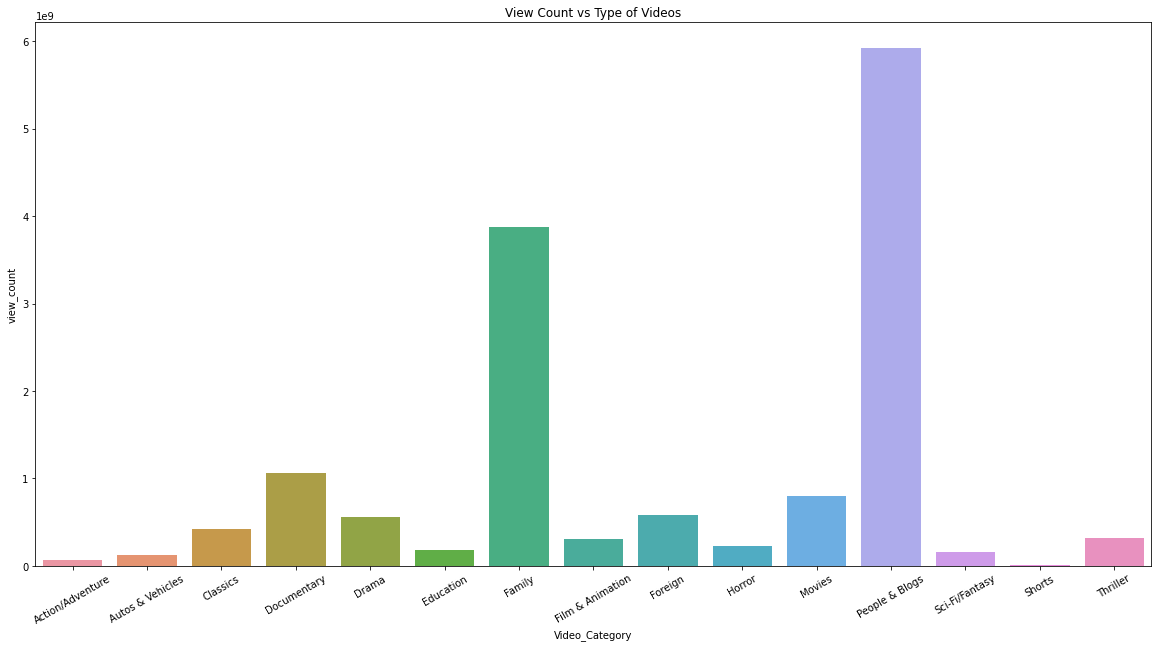

In [23]:
# 카테고리별 조회수 시각화
plt.figure(figsize=(20, 10))

plt.title("View Count vs Type of Videos")
plt.xticks(rotation = 30)

sns.barplot(data = df_Views_Analysis, x = 'Video_Category', y = 'view_count')

The Above Data infers:
* All the videos uploaded are categorised to 14 Types.
* Out of all, People & Blogs and Family has highest view count, Likes and Dislikes.

But is that right way of analysis?
* Dislikes would be more as there are more views. Shouldn't we consider the percentage ?
* Does highest views say that the public are highly interested in watching those Category videos?

Let's dive deep further to understand even more

* Usually, In most cases, viewers just watch the video and turn to other video without Liking/Disliking/Commenting. But if they responded to a video in like/comment/dislike then that does signifies something and we need to capture that.
* Let me create a Response percentage column which signifies the public response to a video and engagement b/w viewers and the video

In [24]:
df_Views_Analysis["Respose_Percentage"] = (df_Views_Analysis["Likes"] + df_Views_Analysis["Dislikes"]) * 100 / df_Views_Analysis["view_count"]
df_Views_Analysis

,Video_Category,view_count,Likes,Dislikes,Respose_Percentage
0,Action/Adventure,65974359,882898,26909,1.379031
1,Autos & Vehicles,126157292,1539575,83675,1.286687
2,Classics,423298022,12033126,352444,2.925969
3,Documentary,1067362659,38683096,1281360,3.744225
4,Drama,555160433,18624655,693238,3.479696
5,Education,177093245,3158320,64932,1.820087
6,Family,3878509439,128389379,2386986,3.371820
7,Film & Animation,306454967,6156502,177584,2.066890
8,Foreign,581650667,10402063,407097,1.858359
9,Horror,226493669,4439586,122113,2.014051


## **Public Response vs Type of Videos** ##

<AxesSubplot:title={'center':'Public Response vs Type of Videos'}, xlabel='Video_Category', ylabel='Respose_Percentage'>

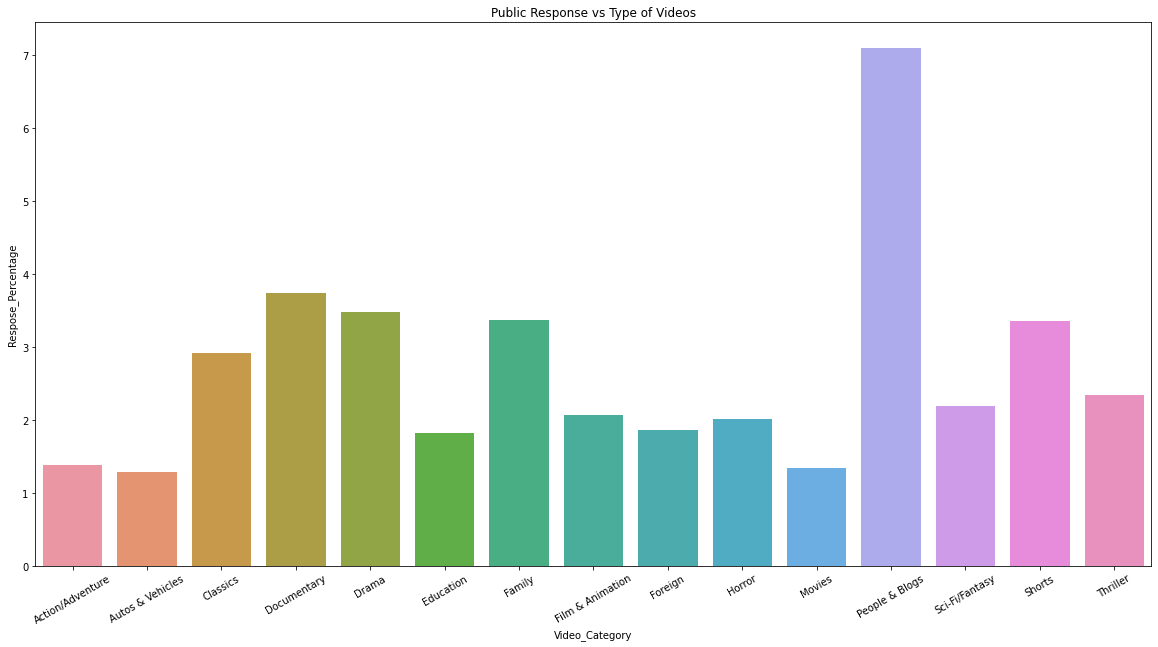

In [25]:
plt.figure(figsize=(20, 10))

plt.title("Public Response vs Type of Videos")
plt.xticks(rotation = 30)
sns.barplot(data = df_Views_Analysis, x = 'Video_Category', y = 'Respose_Percentage')

In [26]:
df_Views_Analysis.sort_values(by = 'Respose_Percentage', ascending=False)

,Video_Category,view_count,Likes,Dislikes,Respose_Percentage
11,People & Blogs,5917432210,413305992,6611672,7.096282
3,Documentary,1067362659,38683096,1281360,3.744225
4,Drama,555160433,18624655,693238,3.479696
6,Family,3878509439,128389379,2386986,3.371820
13,Shorts,6617040,212043,10392,3.361548
2,Classics,423298022,12033126,352444,2.925969
14,Thriller,324394874,7329533,294095,2.350107
12,Sci-Fi/Fantasy,162966129,3483648,97362,2.197395
7,Film & Animation,306454967,6156502,177584,2.066890
9,Horror,226493669,4439586,122113,2.014051


So now, We can see that Viewers are highly reacting to People & Blogs , Documentary, Drama. Let's randomly see what those videos are

In [27]:
df_maxViews[df_maxViews['Video_Category'].isin(['People & Blogs', 'Documentary', 'Drama'])].sample(20)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,Video_Category
60953,wUk3xcv6YpI,릴카...제로투,2021-06-07T11:46:22Z,릴카,22,2021-06-20T00:00:00Z,릴카|llilka|Lilka|종합게임|종합게임방송|종합게임채널|게임채널|게임|gam...,5045341,46587,2830,3644,Documentary
511,XfLwZ0yr_dU,편집자님을 인터뷰했어요!,2020-08-13T11:00:07Z,쏘대장,22,2020-08-15T00:00:00Z,쏘대장|쏘튜브|쏘입니다|아프리카|BJ|편집자|당근|흔들흔들|쏘집자|쏘튜브편집자|쏘대...,373085,7969,129,1405,Documentary
8283,8OVZooxDkqA,프로미스나인 'Feel Good (SECRET CODE)' Choreography ...,2020-09-30T03:00:00Z,Official fromis_9,10,2020-10-06T00:00:00Z,프로미스나인|fromis9|fromisnine|노지선|송하영|이새롬|이채영|이나경|...,322085,33216,94,2213,People & Blogs
3587,UmI94FXx__M,LEE SUHYUN - Reflection (From Mulan/Official V...,2020-08-31T04:00:05Z,DisneyMusicAsiaVEVO,10,2020-09-06T00:00:00Z,LEE|SUHYUN|Reflection|(From|Mulan/Official|Vid...,1648516,144687,726,5674,People & Blogs
13247,U_3XoYW_ccU,MONSTA X 몬스타엑스 'Love Killa' Teaser,2020-10-29T13:00:06Z,starshipTV,10,2020-11-01T00:00:00Z,Kpop|1theK|Starshiptv|starship|loen|로엔|뮤비|티져|M...,611467,140769,242,12347,People & Blogs
53095,_oOSSE71bcA,[이벤트] 택배 랜덤 디펜스! 히밥 31인분 올 클리어? l [택슐랭가이드 스페셜],2021-05-14T10:34:06Z,택배와따,22,2021-05-23T00:00:00Z,[None],348480,3519,176,356,Documentary
15734,tE27QEQGBFU,[4K] 가을밤에 들으면 갬성 풀 충전 되는 '잔나비-가을밤에 든 생각' (Acou...,2020-11-07T10:00:10Z,딩고 뮤직 / dingo music,10,2020-11-14T00:00:00Z,딩고뮤직|dingo|dingomusic|music|kpop|live|멜론|세로라이브...,162041,7606,59,459,People & Blogs
4590,tV4M2shsf2M,【클린버전】 임영웅 & 홍지민 - 그대는 나의 인생 💙사랑의 콜센타 24화💙,2020-09-10T15:21:38Z,미스&미스터트롯 공식계정,22,2020-09-13T00:00:00Z,미스터트롯|미스트롯|사랑의콜센타|뽕숭아학당|트로트|티비조선|임영웅|홍지민|그대는나의인생,401358,15278,304,1034,Documentary
36351,2LgNL2oXk8I,?? : 니 내 누군지 아니?,2021-02-21T08:00:01Z,코너Korner,23,2021-03-01T00:00:00Z,일상예능|브이로그|vlog|브이로거,278991,2648,147,1094,Drama
29139,m4WCZZ9UFpo,당신이 망한 머리를 살려준다는 의사입니까?ㅋㅋㅋㅋㅋㅋㅋㅋ Feat. 기우쌤,2021-01-17T03:00:08Z,조재원,23,2021-01-23T00:00:00Z,[None],594873,10474,233,824,Drama


Let's create Similar Percentages and see what they infer

In [28]:
df_Comments.head()

,Video_Category,comment_count
0,Action/Adventure,88448
1,Autos & Vehicles,231402
2,Classics,1216147
3,Documentary,4566210
4,Drama,2168965


In [29]:
df_Views_Analysis["LIkesPercentage"] = df_Views_Analysis["Likes"] * 100 / df_Views_Analysis['view_count']
df_Views_Analysis["DislikesPercentage"] = df_Views_Analysis["Dislikes"] * 100 / df_Views_Analysis['view_count']
df_Views_Analysis["Comments"] = df_Comments["comment_count"]
df_Views_Analysis["CommentsPercentage"] = df_Views_Analysis["Comments"] * 100 / df_Views_Analysis['view_count']
df_Views_Analysis.head(3)

,Video_Category,view_count,Likes,Dislikes,Respose_Percentage,LIkesPercentage,DislikesPercentage,Comments,CommentsPercentage
0,Action/Adventure,65974359,882898,26909,1.379031,1.338244,0.040787,88448,0.134064
1,Autos & Vehicles,126157292,1539575,83675,1.286687,1.220361,0.066326,231402,0.183423
2,Classics,423298022,12033126,352444,2.925969,2.842708,0.083261,1216147,0.287303


<AxesSubplot:xlabel='Video_Category'>

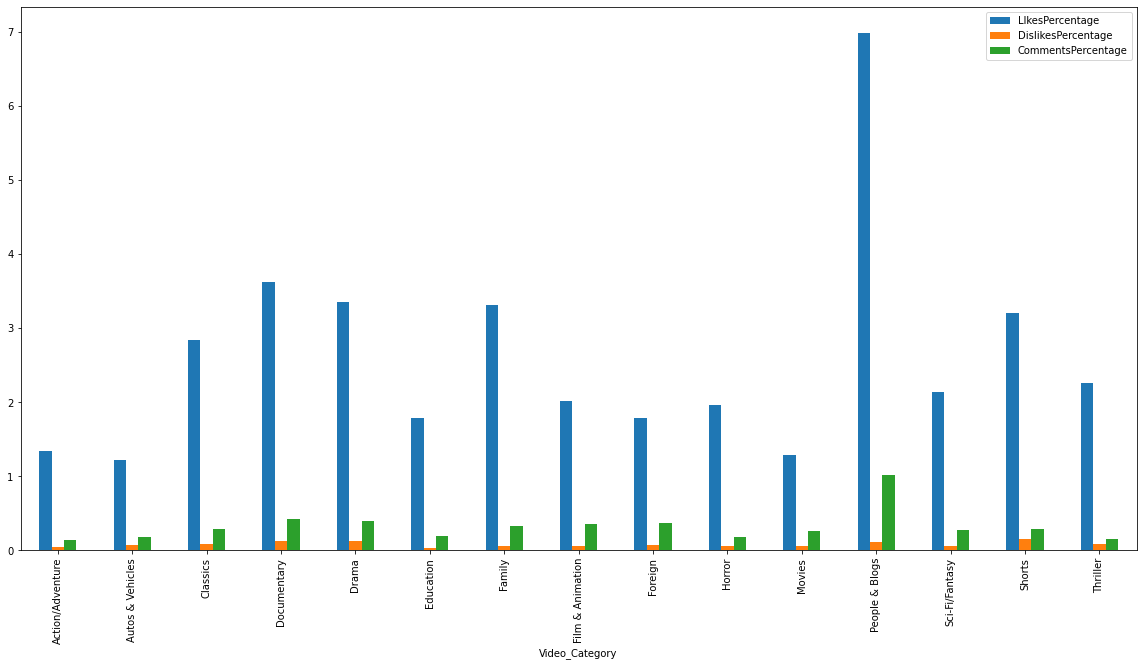

In [30]:
# 시각화

df_Views_Analysis.plot(x = 'Video_Category', y = ['LIkesPercentage', 'DislikesPercentage', 'CommentsPercentage'],
                      kind = "bar", figsize = (20, 10))

Text(0, 0.5, 'ViewCount')

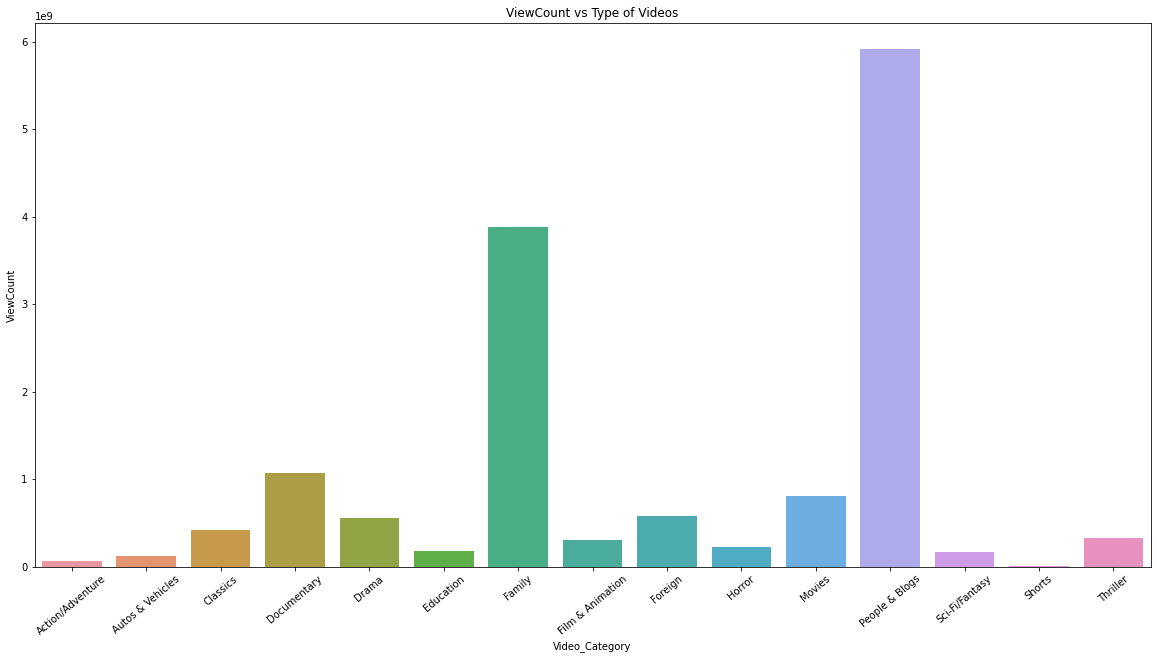

In [31]:
# 카테고리별 조회수 시각화
plt.figure(figsize=(20, 10))

plt.title("ViewCount vs Type of Videos")
plt.xticks(rotation = 40)

sns.barplot(data = df_Views_Analysis, x='Video_Category', y='view_count')
plt.ylabel("ViewCount")

## **CommentsPercentage vs Type of Videos** ##

<AxesSubplot:title={'center':'CommentsPercentage vs Type of Videos'}, xlabel='Video_Category', ylabel='CommentsPercentage'>

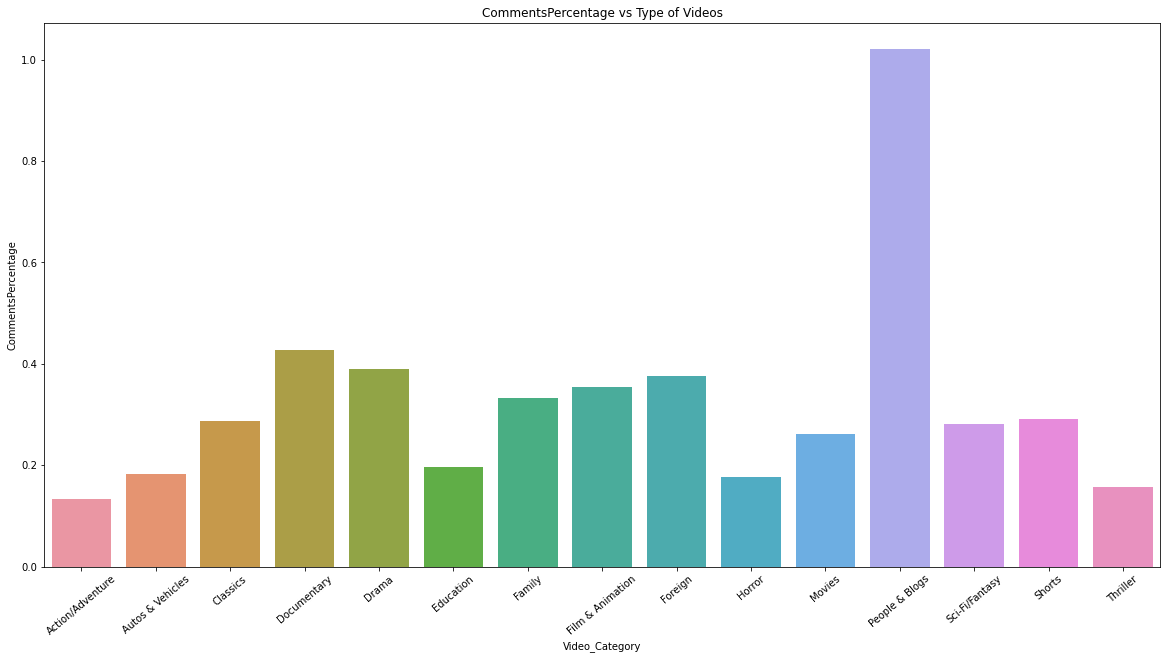

In [32]:
plt.figure(figsize = (20, 10))
plt.title("CommentsPercentage vs Type of Videos")
plt.xticks(rotation = 40)

sns.barplot(data = df_Views_Analysis, x = 'Video_Category', y = 'CommentsPercentage')

From above graphs, We can understand that people tend to comment more over People & Blogs Category Videos. Let's see few such data

In [33]:
df_maxViews[df_maxViews['Video_Category'].isin(['People & Blogs'])].sample(20)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,Video_Category
15069,uD7FFjfhhTY,[K-Choreo 8K] 트와이스 직캠 I CAN'T STOP ME (TWICE C...,2020-11-06T09:41:27Z,KBS Kpop,10,2020-11-11T00:00:00Z,KBS|KPOP|뮤직|KBSKPOP|K-POP|케이팝|kpop|KBSKpop|음악|...,1620730,52757,1171,2171,People & Blogs
21343,G7wtOBzPdFw,트롯전국체전 정통 트롯가수 진해성리뷰 (진해성과 전화 인터뷰),2020-12-06T12:57:53Z,임성환TV노래강사,10,2020-12-14T00:00:00Z,노래강사임성환|뽕숭아학당|임영웅|장민호|이찬원|영탁,59488,3255,98,348,People & Blogs
29353,wFaeFkrKhK4,'미스트롯2'에서 활약중인 국악신동 김태연의 소리 스승! 박정아 명창이 씩씩한 모습...,2021-01-15T23:00:11Z,얼씨구TV,10,2021-01-24T00:00:00Z,진도|씻김굿|육자배기|진도아리랑|판소리|박정아|박정아 명창|박정아 김태연|박정아 눈...,194464,4039,141,280,People & Blogs
17547,gpzk7cjKL6g,비투비 포유 (BTOB 4U) - Show Your Love | 사각라이브 Squ...,2020-11-18T11:00:11Z,Gems 잼스 - Geniemusic Media Studio,10,2020-11-24T00:00:00Z,kpop|melon|잼스|GEMS|지니뮤직|GENIE|LIVE|노래|가요|비투비|b...,171270,18025,89,674,People & Blogs
823,T9Zu7tTz2dM,"(G)I-DLE, DUMDi DUMDi ((여자)아이들, 덤디덤디) [THE SHO...",2020-08-11T10:46:55Z,The K-POP,10,2020-08-17T00:00:00Z,K-pop|Kpop|SBS|Korea|sbsmedianet|200811|THE SH...,606065,30771,336,1317,People & Blogs
45122,JjyZ3Gnim58,[EPISODE] BTS (방탄소년단) @ 200929 The Tonight Show,2021-04-04T10:00:01Z,BANGTANTV,10,2021-04-13T00:00:00Z,방탄소년단|BTS|BANGTAN|HIPHOP|알엠|RM|슈가|SUGA|제이홉|jho...,6215970,1057941,3372,55109,People & Blogs
6543,gyqx8i40dkU,2008** V & Jung Kook (+ENG),2020-09-25T08:09:25Z,BANGTANTV,10,2020-09-27T00:00:00Z,[None],5616988,1225915,3018,45686,People & Blogs
12506,F4qugKTiiK8,LEE SUHYUN - ‘ALIEN’ 1018 SBS Inkigayo,2020-10-18T09:38:38Z,AKMU,10,2020-10-27T00:00:00Z,YG Entertainment|YG|와이지|K-pop|악동뮤지션|악뮤|AKDONG ...,1729039,117542,979,4680,People & Blogs
60528,IEhQpQR0PEU,Don't fight the feeling,2021-06-07T09:02:32Z,EXO - Topic,10,2021-06-17T00:00:00Z,EXO|DON'T FIGHT THE FEELING - Special Album|Do...,1617024,79534,1147,51,People & Blogs
15939,4jXLHKMRA-E,임영웅 [HERO] MV,2020-11-04T03:05:05Z,임영웅,10,2020-11-15T00:00:00Z,미스터트롯|트로트|임영웅|트로트영웅|포천의아들|아침마당|판듀|전국노래자랑|영웅|홍대...,4460190,99423,2556,20703,People & Blogs


한국 유튜브 트렌드는 거의 케이팝 중심으로 보임

## **DislikesPercentage vs Type of Videos** ##

<AxesSubplot:title={'center':'DislikesPercentage vs Type of Videos'}, xlabel='Video_Category', ylabel='DislikesPercentage'>

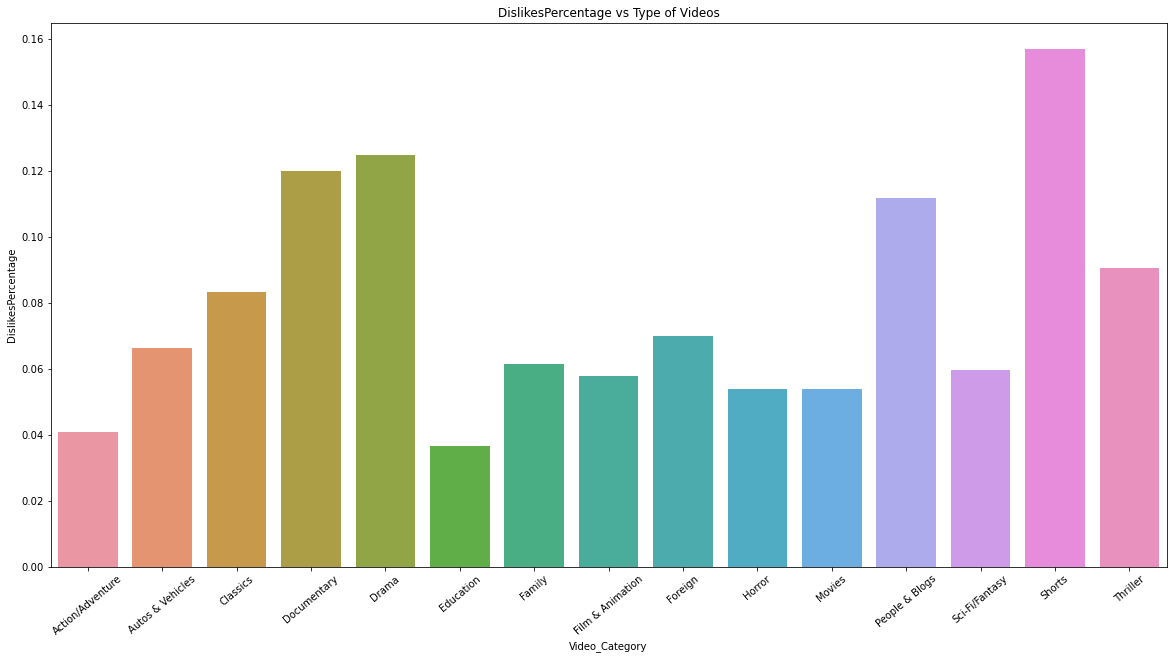

In [34]:
plt.figure(figsize = (20, 10))
plt.title("DislikesPercentage vs Type of Videos")
plt.xticks(rotation = 40)

sns.barplot(data = df_Views_Analysis, x = 'Video_Category', y = 'DislikesPercentage')

Seems like viewers disliked videos of type Shorts, Drama and Documentary. Let's see few of them

In [35]:
df_maxViews[df_maxViews['Video_Category'].isin(['Shorts', 'Drama', 'Documentary'])].sample(20)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,Video_Category
12067,U9r3gH2mEes,SUB) 땡초듬뿍 마라짬뽕🌶🌶 밥도 말아서 군만두랑 계란후라이 꿀맛 Mukbang...,2020-10-19T11:16:18Z,수향TV [suhyangTV],22,2020-10-25T00:00:00Z,Indonésia|italiano|ประเทศไทย|Россия|Deutschlan...,215342,4878,297,371,Documentary
52548,Xsr3jaEkTko,삼촌 많이 시킬거잖아(익숙)ㅋㅋㅋ아침밥으로 동네김밥천국 다 털기..무려7가지ㄷㄷㅋㅋ...,2021-05-12T09:00:09Z,웅이woongei,22,2021-05-20T00:00:00Z,먹방|웅이|MUKBANG|푸드파이터|EATING SHOW|김밥천국|라볶이|가성비|야외먹방,571322,8824,229,785,Documentary
39142,TW_P--OmLPU,[354 근황_#30] 354 in 광장시장 | 외국사람? ㄴㄴ 한국사람? ㅇㅇ 광...,2021-03-02T10:00:05Z,354 삼오사,22,2021-03-14T00:00:00Z,354|삼오사|다니엘|독일|럭키|인도|알베르토|이탈리아|회담|토론|삼자회담|비정상회...,919275,21175,138,2291,Documentary
27540,YiMb5Hws2SE,보디빌더 김강민 돼지의삶 체험시켜주기,2021-01-06T12:00:25Z,사나이 김기훈,23,2021-01-15T00:00:00Z,레전드|김기훈|아프리카tv|아프리카김기훈|킹기훈|끼후이|사나이김기훈|버억|기훈|기훈...,1319830,11838,688,1451,Drama
38328,W2iM-A5eL6o,Day61. 에이 원래 운동했던 분 아닌가요?,2021-03-03T08:35:22Z,긴벌레 LongBug,22,2021-03-10T00:00:00Z,[None],207322,1398,51,658,Documentary
47947,HFKWCLgn0dw,"700원짜리 81미리 박격포 소시지빵, 계란빵 - 월배시장 #shorts - Egg...",2021-04-21T02:00:03Z,JoyFood 조이푸드,22,2021-04-27T00:00:00Z,korean|streetfood|맛집|korean street food,383323,2683,409,256,Documentary
61931,4ZTx9aDZ2jY,2년간 운영한 가게를 폐업하게됐습니다,2021-06-16T12:00:02Z,사나이 김기훈,23,2021-06-25T00:00:00Z,레전드|김기훈|아프리카tv|아프리카김기훈|킹기훈|끼후이|사나이김기훈|버억|기훈|기훈...,998698,12111,6231,1510,Drama
41942,SvsdftzxyoA,이발,2021-03-18T08:01:09Z,장삐쭈,23,2021-03-28T00:00:00Z,[None],1556988,26151,474,4729,Drama
15727,NnBhuu4b2aU,열망의 치킨 먹방,2020-11-07T11:00:05Z,쏘대장,22,2020-11-14T00:00:00Z,쏘대장|딕헌터|치요남치킨|치킨|먹방|치킨먹방|광고|치요남치킨 통다리|레드케인|블랙소...,697425,9798,361,2248,Documentary
15146,EBqd1i9TGRw,"[vlog] 지지고 볶는 일상, 24살 싱글맘 브이로그💓",2020-11-04T07:48:07Z,제이월드,22,2020-11-11T00:00:00Z,[None],468749,8367,125,978,Documentary


## **LikesPercentage vs Type of Videos** ##

Text(0, 0.5, 'Likes')

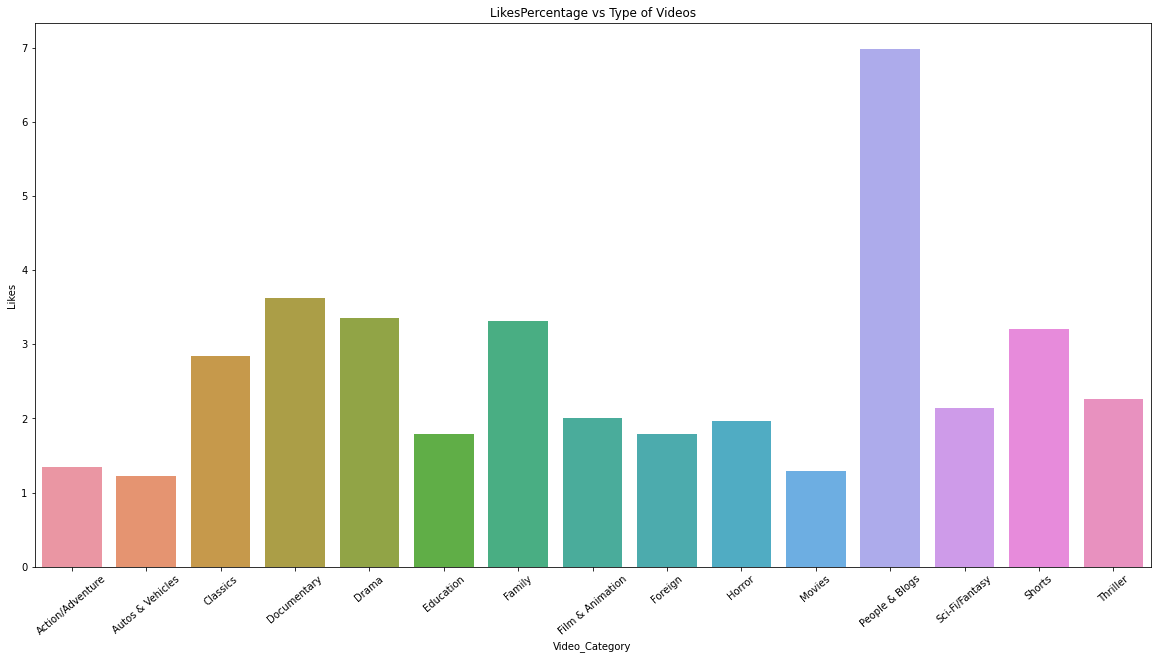

In [36]:
plt.figure(figsize = (20, 10))
plt.title("LikesPercentage vs Type of Videos")
plt.xticks(rotation = 40)

sns.barplot(data = df_Views_Analysis, x = 'Video_Category', y = 'LIkesPercentage')
plt.ylabel("Likes")

# Channel Analysis (채널 분석)

In [37]:
df_maxViews.head(1)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,Video_Category
55138,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,HYBE LABELS,10,2021-06-04T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,296314174,16464253,181350,6939302,People & Blogs


In [38]:
# 채널명 별 총 조회수를 df_Channel에 넣기
df_Channel = df_maxViews.groupby('channelTitle')['view_count'].sum().reset_index()
# 채널명 별 총 좋아요 수를 df_Like에 넣기
df_Like = df_maxViews.groupby('channelTitle')['likes'].sum().reset_index()
# 채널명 별 총 싫어요 수를 df_Dislike에 넣기
df_Dislike = df_maxViews.groupby('channelTitle')['dislikes'].sum().reset_index()
# 채널명 별 총 댓글 수를 df_Comments에 넣기
df_Comments = df_maxViews.groupby('channelTitle')['comment_count'].sum().reset_index()

# df_Channel에 모두 추가
df_Channel["Likes"] = df_Like['likes']
df_Channel["Dislikes"] = df_Dislike['dislikes']
df_Channel["Comments"] = df_Comments['comment_count']

df_Channel.sample(10)

,channelTitle,view_count,Likes,Dislikes,Comments
1071,드림텔러(DreamTeller),4238606,37206,1865,4282
518,SBS FiL [에스비에스 필],1036375,8342,232,547
217,HIPHOPLE,283284,4107,51,1042
215,HANA 김하나,1429201,36397,1341,4418
557,STN SPORTS,477084,4751,159,0
1730,윤혜진의 What see TV,320048,6475,225,764
2124,한문철 TV,5968272,54899,2174,28338
683,XtvN,325272,4209,125,369
936,깨방정,1627360,18357,1791,2598
31,AKMU,15933072,1508307,8949,58057


In [39]:
# 조회수가 많은 순서로 내림차순 (상위 25개)
df_Channel.sort_values(by = 'view_count', ascending=False).iloc[:25, :]

,channelTitle,view_count,Likes,Dislikes,Comments
546,SMTOWN,745358217,36474412,602069,9499455
90,Big Hit Labels,715669620,64186239,1380013,14119724
75,BLACKPINK,706104243,56377287,1541330,7779438
223,HYBE LABELS,549981097,44830484,383222,11603431
266,JYP Entertainment,546333949,22642912,478388,4463331
71,BANGTANTV,477855465,73570044,368107,3531799
580,Stone Music Entertainment,137170561,2932787,56612,372608
57,Apple,121756803,2933995,196919,0
1928,짤툰,105906771,2036415,49488,465001
548,SPOTV,105265504,791699,51259,383244


## **Channel vs total views** ##

In [40]:
Channel_Views = df_Channel.sort_values(by = 'view_count', ascending=False).iloc[:25, :]

Text(0, 0.5, 'Total Views')

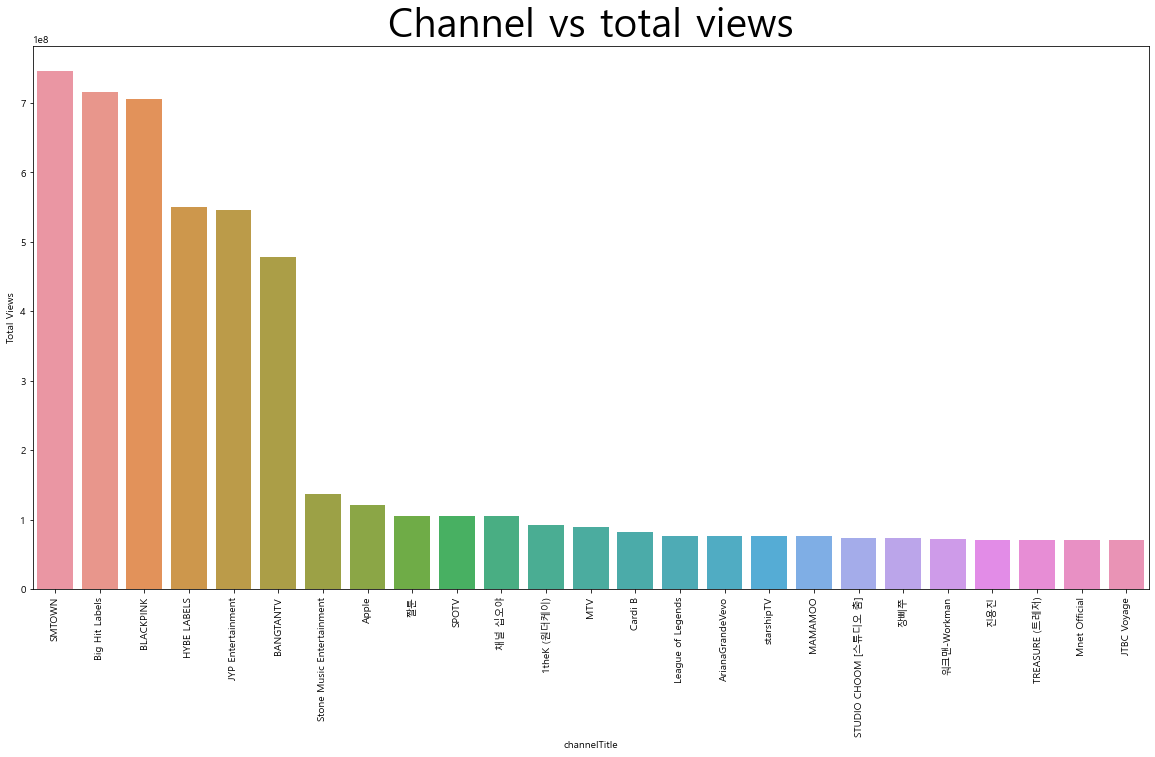

In [41]:
# 시각화
plt.figure(figsize = (20, 10))
# 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
# 차트 제목
plt.title("Channel vs total views", size = 40)
plt.xticks(rotation = 90)
sns.barplot(data=Channel_Views, x="channelTitle", y="view_count")

# add label
plt.ylabel("Total Views")

## **Channel vs total Likes** ##

In [42]:
Channel_Views = df_Channel.sort_values(by = 'Likes', ascending=False).iloc[:25, :]

Text(0, 0.5, 'Total Likes')

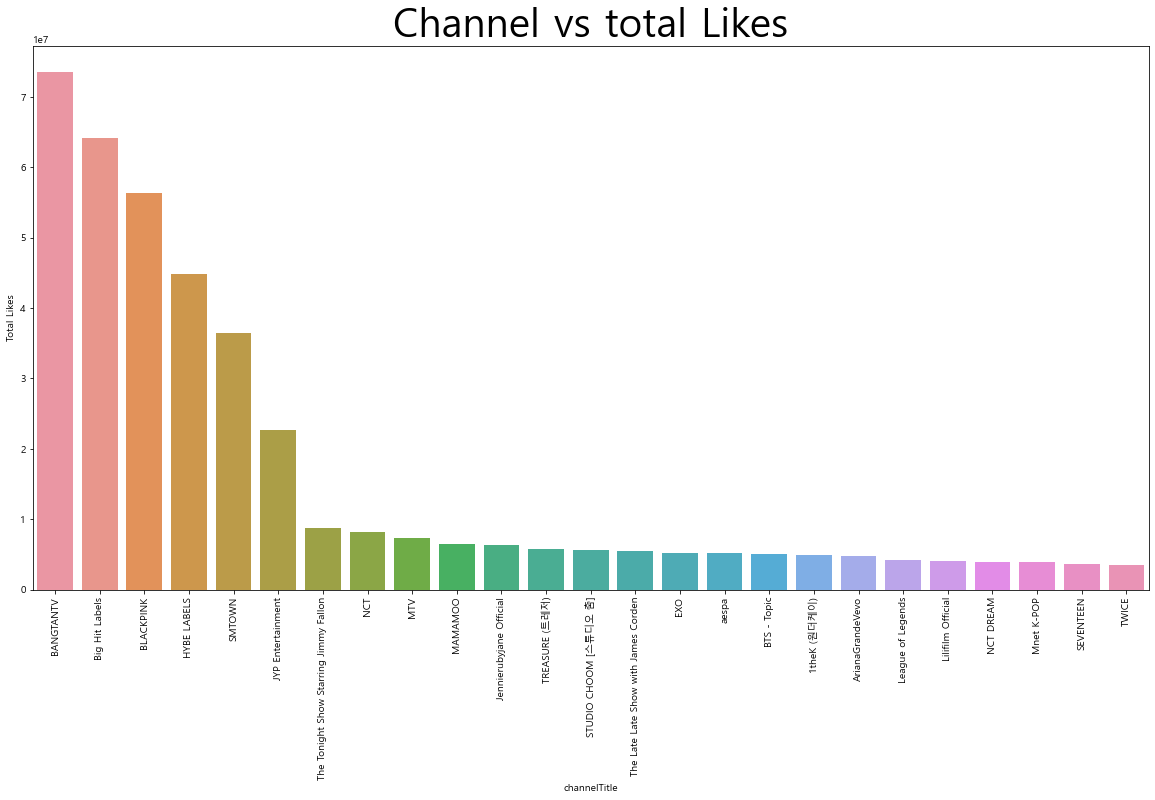

In [43]:
# 시각화
plt.figure(figsize = (20, 10))
# 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
# 차트 제목
plt.title("Channel vs total Likes", size = 40)
plt.xticks(rotation = 90)
sns.barplot(data=Channel_Views, x="channelTitle", y="Likes")

# add label
plt.ylabel("Total Likes")

## **Channel vs total Comments** ##

In [44]:
Channel_Views = df_Channel.sort_values(by = 'Comments', ascending=False).iloc[:25, :]
Channel_Views

,channelTitle,view_count,Likes,Dislikes,Comments
90,Big Hit Labels,715669620,64186239,1380013,14119724
223,HYBE LABELS,549981097,44830484,383222,11603431
546,SMTOWN,745358217,36474412,602069,9499455
75,BLACKPINK,706104243,56377287,1541330,7779438
266,JYP Entertainment,546333949,22642912,478388,4463331
71,BANGTANTV,477855465,73570044,368107,3531799
610,TREASURE (트레저),71321934,5727051,75219,2061434
175,EXO,25096891,5144268,17600,623006
269,Jennierubyjane Official,43803803,6306850,66299,619741
430,NCT,69200761,8241275,21992,593523


Text(0, 0.5, 'Total Comments')

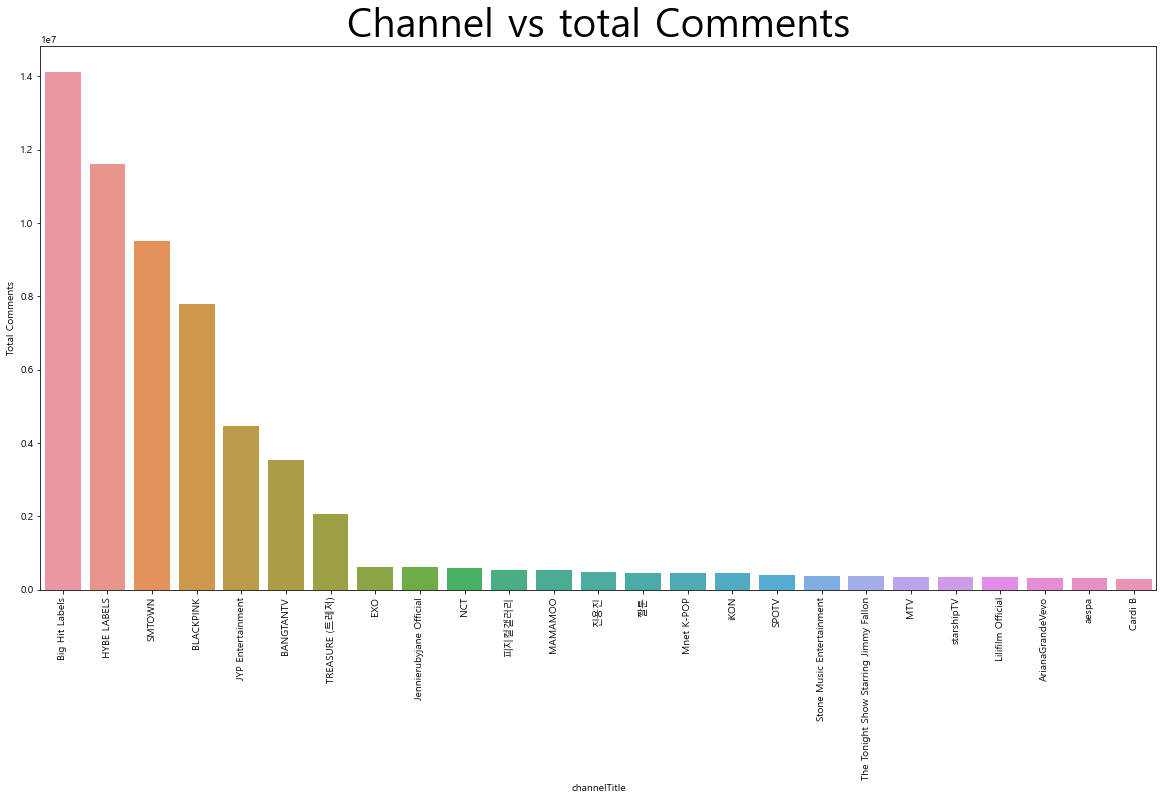

In [45]:
# 시각화
plt.figure(figsize = (20, 10))
# 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
# 차트 제목
plt.title("Channel vs total Comments", size = 40)
plt.xticks(rotation = 90)
sns.barplot(data=Channel_Views, x="channelTitle", y="Comments")

# add label
plt.ylabel("Total Comments")

Let's try some different analysis now

In [46]:
# 값을 입력하면 각 video_id별로 트렌드 영상에 며칠동안 올랐는지 알 수 있는 함수 만들기
def fetch_video_times(value):
    return NoOfDaysInTrending[value]

Let's try to find the Channels that have their videos in trending for most of the times.

In [47]:
# df_maxViews에 'times_in_trending' 변수 추가
df_maxViews["times_in_trending"] = df_maxViews['video_id'].apply(fetch_video_times)
df_maxViews.sample(5)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,Video_Category,times_in_trending
8688,p2-b13eNNa8,누구든 한방에 보낼 수 있는 주먹 vs 통증을 못 느끼는 몸(명승사자 출몰ㄷㄷ),2020-09-30T05:29:40Z,매미킴 TV,17,2020-10-08T00:00:00Z,김동현|매미킴 TV|매미킴|건강|다이어트|홈트|홈트레이닝|호신술|파이터|종합격투기|...,1192438,8752,240,2375,Movies,7
20940,2iC1SIWJb1Y,어몽어스 애니메이션 in MIRA HQ EP4 AMONG US ANIMATION i...,2020-12-02T11:27:09Z,ONTHECAT 온더캣,1,2020-12-12T00:00:00Z,어몽어스|어몽어스 애니메이션|애니메이션|among us|among us animat...,289482,7101,162,1467,Film & Animation,9
30748,uRnVj6K1GWE,"vlog | 마트에서 장보고 콩나물 불고기🥩생선까스 만들어먹기, 취미생활 즐기는 대...",2021-01-25T11:00:32Z,지현꿍,22,2021-01-31T00:00:00Z,[None],1174353,41045,418,2579,Documentary,6
42545,JJSkvNRq9Hk,작은 게 18마리 잡아서 한입에 먹는 양념게장을 만들어 먹어보자!,2021-03-21T03:00:30Z,헌터퐝,22,2021-03-31T00:00:00Z,게|미니게|미니게 양념게장|양념게장 레시피|게 손질|게장|작은 게,528745,6313,425,1130,Documentary,10
38344,b2qy-sfu4sU,[ENG] 샤이니를 두렵게 만드는 것들 | [SHINee] EXCLUSIVE!,2021-02-28T07:00:15Z,스브스케이팝 / SBS KPOP,10,2021-03-10T00:00:00Z,Inkigayo|인기가요직캠|SBSKPOP|스브스케이팝|인기가요|인가직캠|안방1열직...,421285,34526,69,2758,People & Blogs,11


Top 25 Videos that are in trending for many days

In [48]:
df_trend_video_tt = df_maxViews.sort_values(by = 'times_in_trending', ascending=False).iloc[:25, :]
df_trend_video_tt

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,Video_Category,times_in_trending
60748,JoR9u44dNjI,대한민국 VS 투르크메니스탄 : FIFA 카타르 월드컵 2차 예선 하이라이트 - 2...,2021-06-05T15:15:01Z,KFATV_한국 축구 국가대표팀,17,2021-06-19T00:00:00Z,축구|대한축구협회|KFATV|축구국가대표팀|벤투호|손흥민|황의조|황희찬|권창훈|정우...,3069531,19127,1259,11608,Movies,24
59949,BhxadmfbFkg,컵라면 먹을 때 절대 일어날리 없는 상황들 ㅋㅋㅋ,2021-06-03T09:00:03Z,웃소 Wootso,23,2021-06-16T00:00:00Z,웃소|wootso|유형|쿡소|호불호|korean types|컵라면 유형|컵라면 웃소...,1372364,14306,925,2758,Drama,24
60548,6cZfUAdTe9Y,극과 극을 살고 있는 인도의 갑부와 빈곤층들!,2021-06-05T02:00:00Z,지식한입,24,2021-06-17T00:00:00Z,[None],1849830,24136,837,3150,Family,23
60547,fANsFnkaX-U,대박... 멧돼지를 아들로 삼은 할아버지｜KBS 주주클럽 050410 방송,2021-06-04T08:00:10Z,KBS동물티비 : 애니멀포유 animal4u,22,2021-06-17T00:00:00Z,[None],4901896,37796,1774,9070,Documentary,23
59951,GBcd8_5rFYk,[EN] 칼로리 계산 킹받네..?!ㅋㅋㅋ 🍕엔조이 커플 고칼로리 먹방 VS 비 헬스...,2021-06-03T11:00:06Z,시즌비시즌 Season B Season,24,2021-06-16T00:00:00Z,유튜버|개그맨|커플|손민수|임라라|쯔양|일주어터|승우아빠|밥굽남|문복희|히밥|나도|...,1451323,20525,513,1635,Family,23
59151,fQwkO_pjMP4,2주더놀릴예정,2021-06-02T09:00:10Z,런닝맨 - 스브스 공식 채널,24,2021-06-14T00:00:00Z,런닝맨|김종국|이광수|지석진|유재석|하하|송지효|전소민|양세찬|runningman|...,3464594,44627,732,4564,Family,23
59937,415YskuV4Lg,[도장TV 8회] 수박먹는 하영이^^;;,2021-06-04T10:00:04Z,도장TV,22,2021-06-16T00:00:00Z,[None],1612467,46860,956,2954,Documentary,22
59549,9pDSxezPTvE,[진돗개 진솔쓰] 차박 일기. #Shorts,2021-06-03T13:00:07Z,진솔쓰Jinsolss,15,2021-06-15T00:00:00Z,진솔쓰|jinsolss|jinsols|진돗개|진돗개 진솔쓰|진돗개 진솔|진돗개 진솔...,804906,25169,642,964,Education,22
57550,SqIBCdGNj0g,밤낮으로 우리집 비번 눌러대는 길고양이 좀 어떻게 해주세요ㅣStray Cat Ent...,2021-05-28T23:00:07Z,SBS TV동물농장x애니멀봐,15,2021-06-10T00:00:00Z,애니멀봐|동물농장|TV동물농장|동물농장 애니멀봐|애니멀봐 동물농장|sbs anima...,2719305,55483,650,5818,Education,22
60345,cHezzE-fPNc,[짐승친구들] 예비군,2021-06-05T06:00:13Z,짤툰,1,2021-06-17T00:00:00Z,짤툰|만화|애니메이션|웹툰|병맛|더빙|병맛더빙|yt:cc=on,1728023,27553,714,4183,Film & Animation,22


Top Channels whose video is in trending for most of the times

## **Channel's Video vs no.of times in Trending** ##

Text(0, 0.5, 'no.of trending')

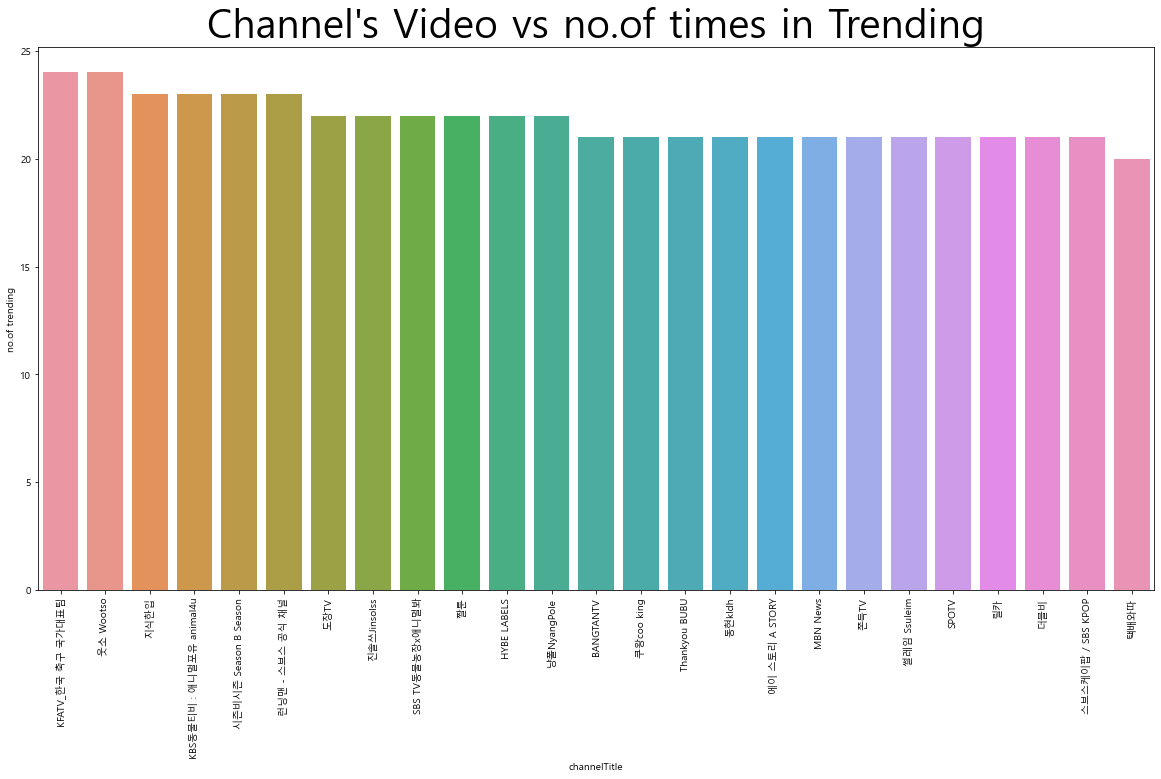

In [49]:
# 시각화
plt.figure(figsize = (20, 10))
# 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
# 차트 제목
plt.title("Channel's Video vs no.of times in Trending", size = 40)
plt.xticks(rotation = 90)
sns.barplot(data=df_trend_video_tt, x="channelTitle", y="times_in_trending")

# add label
plt.ylabel("no.of trending")

Top 30 Channels whose Videos are in Trending

In [50]:
# 채널명 별 트렌드 시간 수
df_Channel_Trending = df_maxViews.groupby("channelTitle")["times_in_trending"].sum().reset_index()
# 채널명 별 주된 카테고리
df_Channel_Trending["Majority_Videos_Category_Type"] = df_maxViews.groupby('channelTitle')['Video_Category'].agg(pd.Series.mode).reset_index()["Video_Category"]
# 트렌드 시간 Top 30 내림차순 정렬
df_Channel_Trending = df_Channel_Trending.sort_values(by = 'times_in_trending', ascending=False).iloc[:30,:]
df_Channel_Trending

,channelTitle,times_in_trending,Majority_Videos_Category_Type
548,SPOTV,501,Movies
1928,짤툰,455,Film & Animation
1963,총몇명,344,Film & Animation
1940,채널 십오야,299,Family
1817,장삐쭈,294,Drama
1452,스포츠타임,288,Movies
2067,파뿌리,284,Family
71,BANGTANTV,281,People & Blogs
1588,엠뚜루마뚜루 : MBC 공식 종합 채널,272,Family
1692,워크맨-Workman,262,Family


## **Channel vs total no.of times in trending** ##

Text(0, 0.5, 'no.of times in trending')

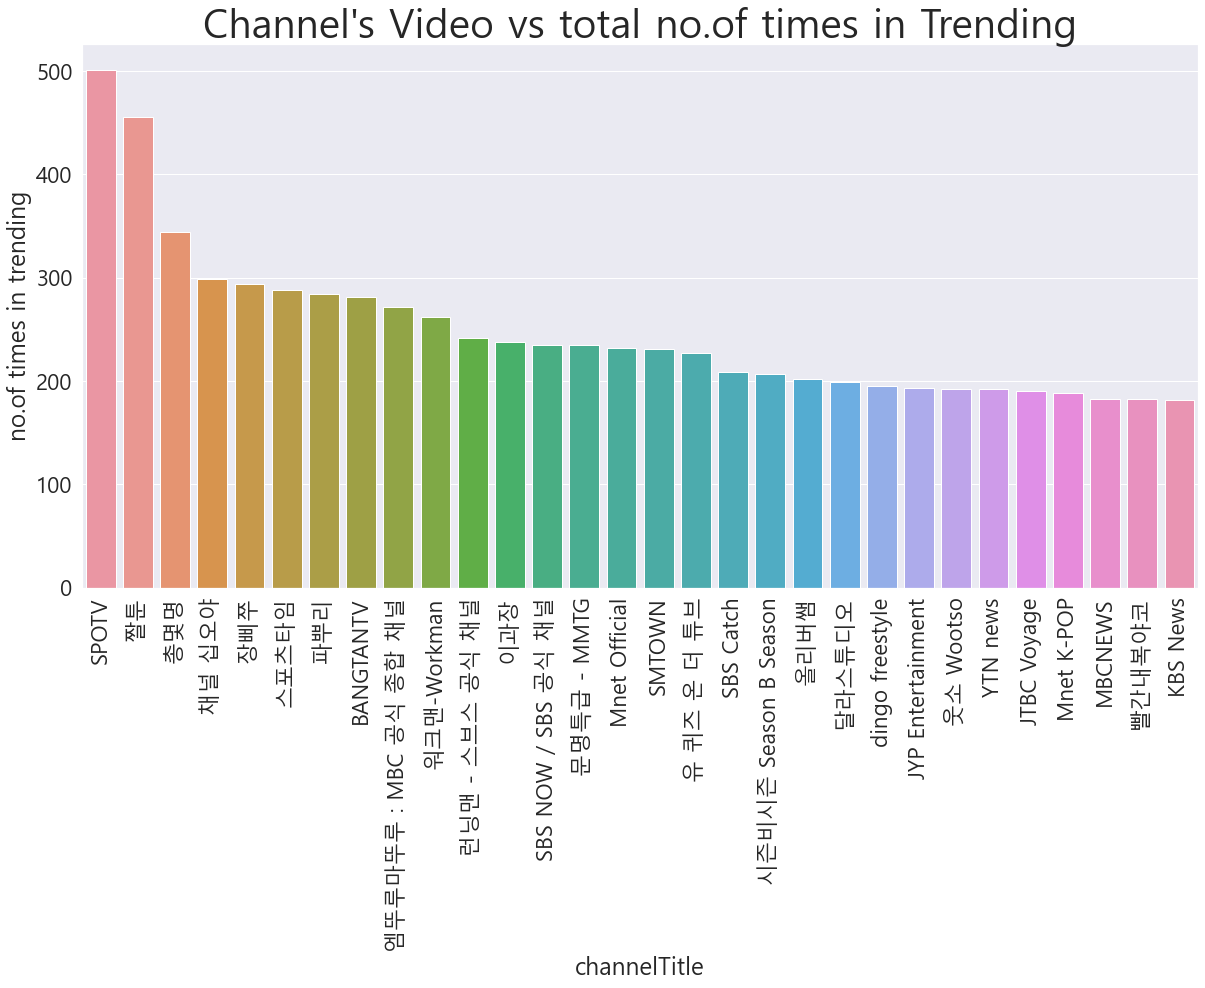

In [52]:
# 시각화
plt.figure(figsize = (20, 10))
# 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 차트 제목
plt.title("Channel's Video vs total no.of times in Trending", size = 40)
plt.xticks(rotation = 90)
sns.barplot(data=df_Channel_Trending, x="channelTitle", y="times_in_trending")

# add label
plt.ylabel("no.of times in trending")

## **Category vs total no.of times in Trending** ##

In [53]:
# 주된 카테고리별 총 트렌드 영상에 오른 날짜의 수
Category_Trending = df_Channel_Trending.groupby('Majority_Videos_Category_Type')['times_in_trending'].sum().reset_index()
Category_Trending

,Majority_Videos_Category_Type,times_in_trending
0,Documentary,238
1,Drama,685
2,Family,3265
3,Film & Animation,799
4,Foreign,557
5,Movies,789
6,People & Blogs,900
7,Sci-Fi/Fantasy,202


Text(0, 0.5, 'no.of times in trending')

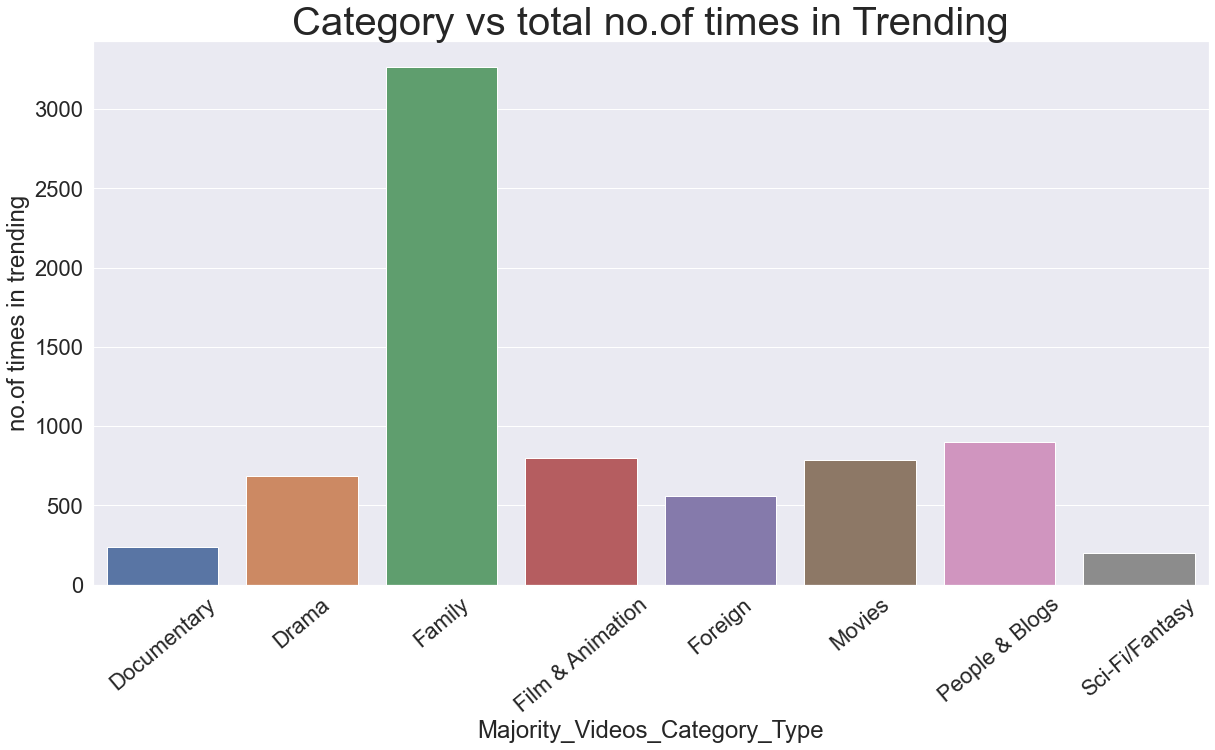

In [55]:
# 시각화
plt.figure(figsize = (20, 10))
# 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 폰트 크기
sns.set(font_scale = 2)
# 차트 제목
plt.title("Category vs total no.of times in Trending", size = 40)
plt.xticks(rotation = 40)
sns.barplot(data=Category_Trending, x="Majority_Videos_Category_Type", y="times_in_trending")

# add label
plt.ylabel("no.of times in trending")

In [56]:
pd.Timestamp(df_minViews.trending_date[1])

Timestamp('2020-08-12 00:00:00+0000', tz='UTC')

In [57]:
# 트렌드 영상으로 오른 시간
df_minViews["JoinedTrending"] = pd.to_datetime(df_minViews.trending_date.str.split(',\s*').str[0])
# 업로드 시간
df_minViews["UploadedTime"] = pd.to_datetime(df_minViews.publishedAt.str.split(',\s*').str[0])
# 트렌드 영상이 되는데 걸린 일 수
df_minViews["DaysTakenToBeOnTrending"] = (df_minViews["JoinedTrending"] - df_minViews["UploadedTime"]).dt.days
# 값이 -1이면 0으로 표시, 아니면 일 수 그대로 표시
df_minViews['DaysTakenToBeOnTrending'] = df_minViews['DaysTakenToBeOnTrending'].apply(lambda x: 0 if x == -1 else x)
df_minViews.sample(10)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,Video_Category,JoinedTrending,UploadedTime,DaysTakenToBeOnTrending
42985,4CLztbFMozQ,탁재훈 매니저 김종국 모음.ZIP [미운우리새끼|SBS방송],2021-04-02T09:00:02Z,레알예능 스브스,24,2021-04-03T00:00:00Z,미운우리새끼|미우새|미우새 탁재훈|탁재훈|탁재훈 반고|탁재훈 티키타카|탁재훈 김종국...,128071,1091,59,146,Family,2021-04-03 00:00:00+00:00,2021-04-02 09:00:02+00:00,0
27362,Zf4gCqnk6i0,이제 💩시노스는 끝?? 갤럭시 S21 시리즈 만져보기 [4K],2021-01-14T16:16:40Z,UNDERkg,28,2021-01-15T00:00:00Z,삼성|갤럭시 s21|galaxy s21|갤럭시 s21 플러스|갤럭시 s21+|갤럭시...,304146,5599,276,2700,Thriller,2021-01-15 00:00:00+00:00,2021-01-14 16:16:40+00:00,0
16778,amnspvOH-EE,Blue & Grey,2020-11-20T05:37:35Z,BTS - Topic,10,2020-11-20T00:00:00Z,BTS (방탄소년단)|BTS|BE|Blue & Grey,2199457,676015,1188,29629,People & Blogs,2020-11-20 00:00:00+00:00,2020-11-20 05:37:35+00:00,0
33985,GnD8aS7Z9gQ,[ENG] 투모로우바이투게더 연준과의 TMI 인터뷰 (TMI interview wi...,2021-02-17T03:00:10Z,GQ KOREA,24,2021-02-17T00:00:00Z,투바투|빅히트|ULKIN|최연준|모아|MOA,173233,0,0,1838,Family,2021-02-17 00:00:00+00:00,2021-02-17 03:00:10+00:00,0
5498,nhRCJ72u0_I,테슬라 배터리데이 주목할 진짜 이유,2020-09-19T03:52:48Z,와우넷 주식투자,27,2020-09-20T00:00:00Z,2차전지|테슬라|MCM|LFP|재조원가|주행거리|배터리종류|NCM|LG화학|삼성SD...,68251,2122,91,0,Sci-Fi/Fantasy,2020-09-20 00:00:00+00:00,2020-09-19 03:52:48+00:00,0
26356,HJalihnRrtM,※역대급 사연※ 30년 동안 의절한 개그맨 최홍림 & 형 | 아이콘택트 73 회,2021-01-09T13:09:01Z,채널A Home,24,2021-01-10T00:00:00Z,아이콘택트|오해|침묵|예능|인터뷰|눈맞춤|강호동|이상민|하하|최홍림|가족|형,1041663,9330,604,5975,Family,2021-01-10 00:00:00+00:00,2021-01-09 13:09:01+00:00,0
45019,yNANxaE7Mak,고상한 체하는 영국인 윤여정 수상소감에 영국이 빵 터졌다 / 연합뉴스 (Yonhap...,2021-04-12T02:36:36Z,연합뉴스 Yonhapnews,25,2021-04-13T00:00:00Z,연합뉴스|yonhapnews|뉴스|영상|이슈|디지털|news|화제|윤여정|미나리|영...,322932,2909,48,308,Foreign,2021-04-13 00:00:00+00:00,2021-04-12 02:36:36+00:00,0
6726,_bGjONVYz3I,오늘나온 롯데리아 밀리터리버거 리뷰. 군대리아,2020-09-28T09:22:26Z,맛상무,26,2020-09-29T00:00:00Z,맛상무|먹방|리뷰|푸드|크리에이터|mukbang|음식|맛집|가짜사나이|밀리터리|밀리테리,240740,3572,219,1881,Horror,2020-09-29 00:00:00+00:00,2020-09-28 09:22:26+00:00,0
17217,rGVqQVMtaUo,Freak (Prod. Slom),2020-11-21T03:04:05Z,Various Artists - Topic,10,2020-11-23T00:00:00Z,lIlBOI|Wonstein|Chillin Homie|Skyminhyuk Show ...,106050,1949,67,117,People & Blogs,2020-11-23 00:00:00+00:00,2020-11-21 03:04:05+00:00,1
29570,zR043fcuV0Y,D.O. 디오 '괜찮아도 괜찮아 (That's okay)' Live Clip,2021-01-25T15:37:53Z,EXO,10,2021-01-26T00:00:00Z,EXO|엑소|엑소케이|엑소엠|exok|exom,1428728,484038,495,81915,People & Blogs,2021-01-26 00:00:00+00:00,2021-01-25 15:37:53+00:00,0


## **Average no.of days took to be in trending** ##

Text(0, 0.5, 'Avg no.of days')

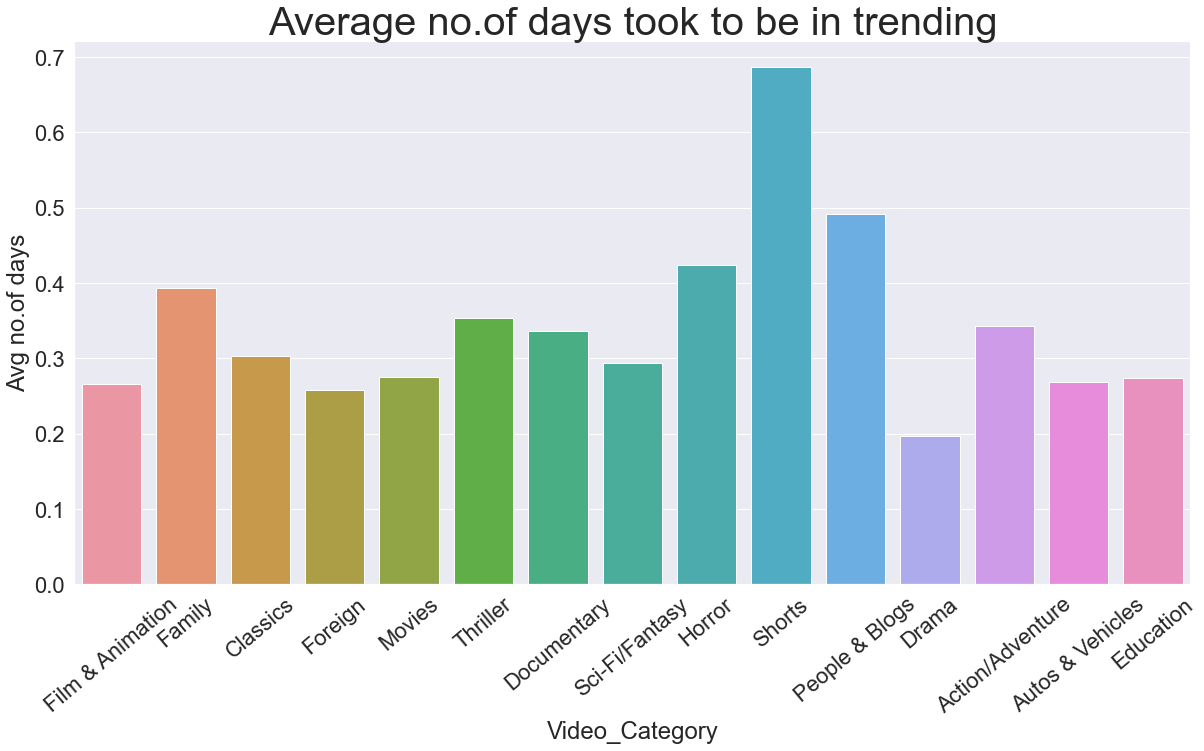

In [59]:
# 시각화
plt.figure(figsize = (20, 10))
# 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 폰트 크기
sns.set(font_scale = 2)
# 차트 제목
plt.title("Average no.of days took to be in trending", size = 40)
plt.xticks(rotation = 40)
sns.barplot(data=df_minViews, x="Video_Category", y="DaysTakenToBeOnTrending", ci=None)

# add label
plt.ylabel("Avg no.of days")